<H1>ФБ-31 Федорович Дарина.</H1>
<H1>Лабараторна робота № 6. Застосування numpy </H1>

Налаштування середовища для даної лабараторної роботи

In [2]:
import numpy as np
import matplotlib.pyplot as plt

print("Setup is complete")

Setup is complete


Завдання 1:
1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y = k + b) для подальшого аналізу
результатів.
2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k та b.
3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома  степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).
4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.

Істинні параметри: k = 2.5, b = 1.0
Метод найменших квадратів: k = 2.3840, b = 1.1289
polyfit: k = 2.3840, b = 1.1289


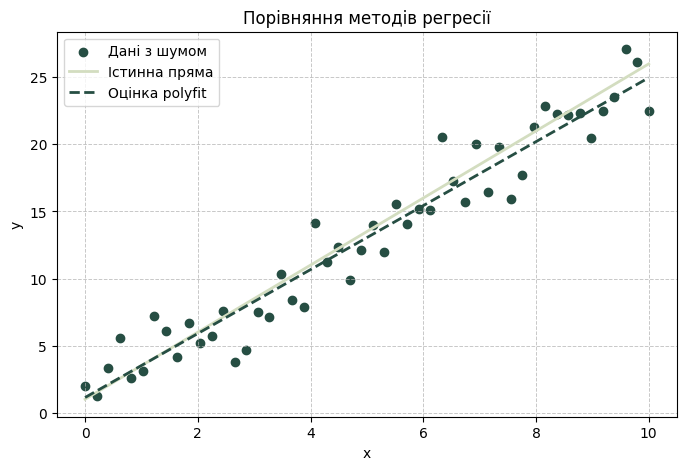

In [13]:
np.random.seed(42)
k_true = 2.5
b_true = 1.0
x = np.linspace(0, 10, 50)
y = k_true * x + b_true + np.random.normal(0, 2, size=x.shape)

def least_squares(x, y):
    n = len(x)
    k = (n * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n * np.sum(x ** 2) - np.sum(x) ** 2)
    b = (np.sum(y) - k * np.sum(x)) / n
    return k, b

k_ls, b_ls = least_squares(x, y)
k_polyfit, b_polyfit = np.polyfit(x, y, 1)


print(f'Істинні параметри: k = {k_true}, b = {b_true}')
print(f'Метод найменших квадратів: k = {k_ls:.4f}, b = {b_ls:.4f}')
print(f'polyfit: k = {k_polyfit:.4f}, b = {b_polyfit:.4f}')

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='#264e43', label='Дані з шумом')
plt.plot(x, k_true * x + b_true, color='#d3ddc0', label='Істинна пряма', linewidth=2)
plt.plot(x, k_polyfit * x + b_polyfit, linestyle='--', color='#264e43', label='Оцінка polyfit', linewidth=2)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Порівняння методів регресії')

plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

plt.show()

Завдання 2:
1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter
2. Додайте отриману лінію регресії на загальний графік
3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки
4. Порівняйте отримані результати з результатами попереднього завдання

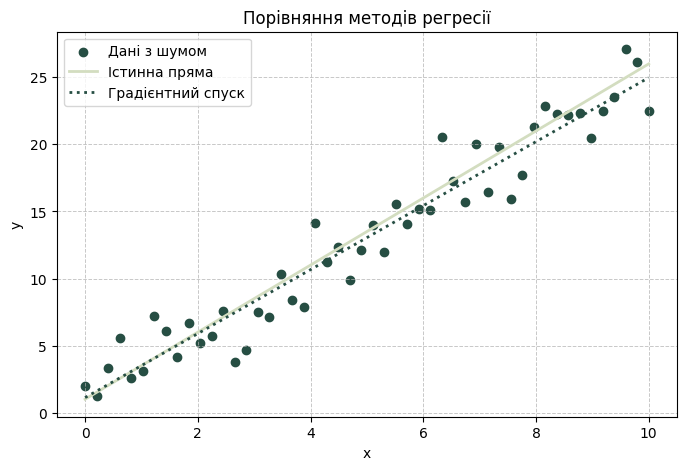

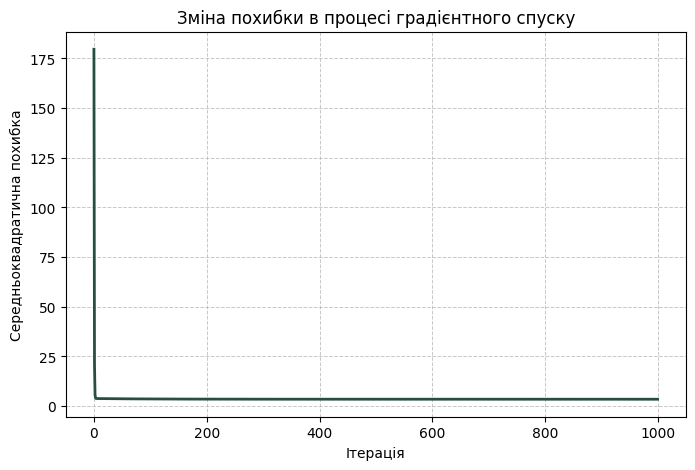

Істинні параметри: k = 2.5, b = 1.0
Метод найменших квадратів: k = 2.3840, b = 1.1289
polyfit: k = 2.3840, b = 1.1289
Градієнтний спуск: k = 2.3852, b = 1.1213


In [ ]:
np.random.seed(42)
k_true = 2.5
b_true = 1.0
x = np.linspace(0, 10, 50)
y = k_true * x + b_true + np.random.normal(0, 2, size=x.shape)

def least_squares(x, y):
    n = len(x)
    k = (n * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n * np.sum(x ** 2) - np.sum(x) ** 2)
    b = (np.sum(y) - k * np.sum(x)) / n
    return k, b

def gradient_descent(x, y, learning_rate=0.01, n_iter=1000):
    k, b = np.random.randn(), np.random.randn()
    n = len(x)
    errors = []
    for i in range(n_iter):
        y_pred = k * x + b
        error = np.mean((y - y_pred) ** 2)
        errors.append(error)
        grad_k = -2/n * np.sum(x * (y - y_pred))
        grad_b = -2/n * np.sum(y - y_pred)
        k -= learning_rate * grad_k
        b -= learning_rate * grad_b
    return k, b, errors

k_ls, b_ls = least_squares(x, y)
k_polyfit, b_polyfit = np.polyfit(x, y, 1)
k_gd, b_gd, errors = gradient_descent(x, y, learning_rate=0.01, n_iter=1000)

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='#264e43', label='Дані з шумом')
plt.plot(x, k_true * x + b_true, color='#d3ddc0', linewidth=2, label='Істинна пряма')
plt.plot(x, k_gd * x + b_gd, linestyle=':', color='#264e43', linewidth=2, label='Градієнтний спуск')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Порівняння методів регресії')
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(errors, color='#264e43', linewidth=2)
plt.xlabel('Ітерація')
plt.ylabel('Середньоквадратична похибка')
plt.title('Зміна похибки в процесі градієнтного спуску')
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

print(f'Істинні параметри: k = {k_true}, b = {b_true}')
print(f'Метод найменших квадратів: k = {k_ls:.4f}, b = {b_ls:.4f}')
print(f'polyfit: k = {k_polyfit:.4f}, b = {b_polyfit:.4f}')
print(f'Градієнтний спуск: k = {k_gd:.4f}, b = {b_gd:.4f}')
